# TASK 6
Analyze sales data over time and forecast future sales using statistical models.

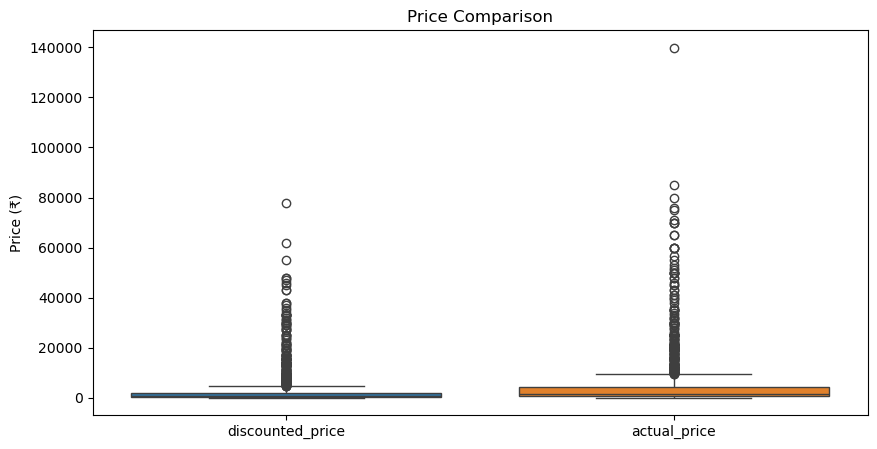


Top 5 Products with Highest Discounts:
                                                                                                                                                                    product_name  actual_price  discounted_price  discount_percentage
                                                                                                Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black)      139900.0           77990.0                 44.0
Coway Professional Air Purifier for Home, Longest Filter Life 8500 Hrs, Green True HEPA Filter, Traps 99.99% Virus & PM 0.1 Particles, Warranty 7 Years (AirMega 150 (AP-1019C))       59900.0           14400.0                 76.0
                                                                     Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM, 128GB Storage) with No Cost EMI & Additional Exchange Offers       74999.0           37990.0                 49.0
                                        

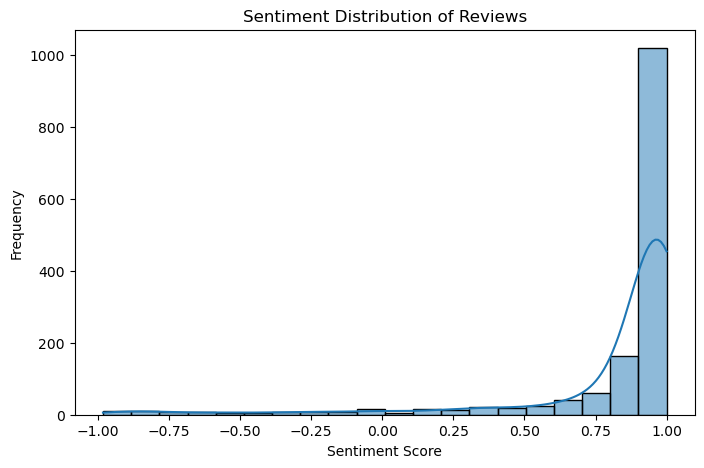


Top 5 Highest Rated Products:
                                                                                                                                                                                                                                                                product_name  rating
                                                                                             Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)     5.0
                                                                               REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White     5.0
                                                                                                          Amazon Basics Wireless Mouse | 2

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Load dataset
file_path = "amazon.csv"
amazon_data = pd.read_csv(file_path)

# ---- Data Cleaning ----
# Convert prices to numeric values
amazon_data['discounted_price'] = amazon_data['discounted_price'].replace('[₹,]', '', regex=True).astype(float)
amazon_data['actual_price'] = amazon_data['actual_price'].replace('[₹,]', '', regex=True).astype(float)
amazon_data['discount_percentage'] = amazon_data['discount_percentage'].replace('%', '', regex=True).astype(float)
amazon_data['rating_count'] = amazon_data['rating_count'].replace(',', '', regex=True).astype(float)

# ---- Price Analysis ----
amazon_data['discount_amount'] = amazon_data['actual_price'] - amazon_data['discounted_price']

# Plot Price Comparison
plt.figure(figsize=(10, 5))
sns.boxplot(data=amazon_data[['discounted_price', 'actual_price']])
plt.title("Price Comparison")
plt.ylabel("Price (₹)")
plt.show()

# Display Top 5 Highest Discounts
print("\nTop 5 Products with Highest Discounts:")
print(amazon_data.nlargest(5, 'discount_amount')[['product_name', 'actual_price', 'discounted_price', 'discount_percentage']].to_string(index=False))

# ---- Sentiment Analysis on Reviews ----
sia = SentimentIntensityAnalyzer()
def get_sentiment(text):
    return sia.polarity_scores(str(text))['compound']

amazon_data['sentiment_score'] = amazon_data['review_content'].apply(get_sentiment)

# Sentiment distribution plot
plt.figure(figsize=(8, 5))
sns.histplot(amazon_data['sentiment_score'], bins=20, kde=True)
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

# ---- Category Trends ----
amazon_data['rating'] = pd.to_numeric(amazon_data['rating'], errors='coerce')

# Display Top 5 Highest Rated Products
print("\nTop 5 Highest Rated Products:")
print(amazon_data.nlargest(5, 'rating')[['product_name', 'rating']].to_string(index=False))

# Most reviewed categories
top_reviewed_categories = amazon_data.groupby('category')['rating_count'].sum().nlargest(5)

# Display Most Reviewed Categories
print("\nMost Reviewed Categories:")
print(top_reviewed_categories.to_string())
